In [1]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By

In [3]:
driver = webdriver.Chrome(ChromeDriverManager().install())



====== WebDriver manager ======
Current google-chrome version is 100.0.4896
Get LATEST chromedriver version for 100.0.4896 google-chrome
Trying to download new driver from https://chromedriver.storage.googleapis.com/100.0.4896.60/chromedriver_win32.zip
Driver has been saved in cache [C:\Users\sunil\.wdm\drivers\chromedriver\win32\100.0.4896.60]
<ipython-input-3-c026f0c15647>:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [105]:
driver.get('https://hoopshype.com/salaries/players/')

In [106]:
players = driver.find_elements(By.CLASS_NAME, 'name')
salary =  driver.find_elements(By.CLASS_NAME, "hh-salaries-sorted")

In [107]:
players_list = []
for p in range(len(players)):
    if players[p].text != '':  
        players_list.append(players[p].text)
salary_list = []
for p in range(len(salary)):
   # if salary[p].text != '':  
    salary_list.append(salary[p].text)



In [108]:
print(len(salary_list))
print(len(players_list))

655
655


In [92]:
salary_list

['2021/22',
 '$45,780,966',
 '$44,310,840',
 '$44,310,840',
 '$44,211,146',
 '$42,018,900',
 '$41,180,544',
 '$39,344,970',
 '$39,344,900',
 '$39,344,900',
 '$39,344,900',
 '$37,980,720',
 '$36,016,200',
 '$35,995,950',
 '$35,500,000',
 '$35,361,360',
 '$35,328,700',
 '$34,967,442',
 '$34,844,000',
 '$33,724,200',
 '$33,003,936',
 '$33,003,936',
 '$32,431,333',
 '$32,405,817',
 '$31,650,600',
 '$31,650,600',
 '$31,650,600',
 '$31,579,390',
 '$31,579,390',
 '$31,579,390',
 '$31,258,256',
 '$30,864,198',
 '$30,800,000',
 '$30,013,500',
 '$29,925,000',
 '$29,467,800',
 '$29,467,800',
 '$28,103,500',
 '$28,103,500',
 '$28,103,500',
 '$28,103,500',
 '$27,000,000',
 '$26,984,128',
 '$26,758,928',
 '$26,000,000',
 '$24,026,712',
 '$24,000,000',
 '$23,073,234',
 '$23,000,000',
 '$21,780,000',
 '$21,700,000',
 '$21,306,816',
 '$21,000,000',
 '$20,932,143',
 '$20,475,000',
 '$20,284,091',
 '$20,002,500',
 '$20,000,000',
 '$19,675,926',
 '$19,500,000',
 '$19,348,907',
 '$18,700,000',
 '$18,604,65

In [109]:
df1 = pd.DataFrame({"PlayerName":players_list[1:],'Salary':salary_list[1:],'Year':2021})
df1.head()

,PlayerName,Salary,Year
0,Stephen Curry,"$45,780,966",2021
1,John Wall,"$44,310,840",2021
2,James Harden,"$44,310,840",2021
3,Russell Westbrook,"$44,211,146",2021
4,Kevin Durant,"$42,018,900",2021


In [110]:

#df1 = pd.DataFrame({'PlayerName':players_list[1:],'Salary':salary_list[1:],'Year':2021})
for yrs in range(2016,2020):
    url = 'https://hoopshype.com/salaries/players/'+str(yrs)+'-'+ str(yrs+1) +'/'
    driver.get(url)
    players = driver.find_elements(By.CLASS_NAME, 'name')
    salary =  driver.find_elements(By.CLASS_NAME, "hh-salaries-sorted")
    players_list = []
    for p in range(len(players)):
        if players[p].text != '':  
            players_list.append(players[p].text)
    salary_list = []
    for p in range(len(salary)):
        #if salary[p].text != '':  
        salary_list.append(salary[p].text)
        #salary_list.pop(0)
    temp_df = pd.DataFrame({'PlayerName':players_list[1:],'Salary':salary_list[1:],'Year':yrs})

    df1 = df1.append(temp_df)

In [113]:
df1.sort_values(by='Year')

,PlayerName,Salary,Year
455,Toney Douglas,"$564,868",2016
103,Mirza Teletovic,"$10,500,000",2016
104,Jared Dudley,"$10,470,000",2016
105,Al Jefferson,"$10,230,179",2016
106,Tyreke Evans,"$10,203,755",2016
...,...,...,...
433,Naji Marshall,"$1,517,981",2021
432,Xavier Tillman,"$1,517,981",2021
431,KJ Martin,"$1,517,981",2021
449,Stanley Johnson,"$1,368,998",2021


In [115]:
df1[df1['PlayerName'] == 'Stephen Curry']

,PlayerName,Salary,Year
0,Stephen Curry,"$45,780,966",2021
81,Stephen Curry,"$12,112,359",2016
0,Stephen Curry,"$34,682,550",2017
0,Stephen Curry,"$37,457,154",2018
0,Stephen Curry,"$40,231,758",2019


Scraping Some Site 

In [1]:
import pandas as pd
from selenium import webdriver
#from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By

In [2]:
driver = webdriver.Chrome('D:/seleniumpython/chromedriver')

<ipython-input-2-ce01065e71ea>:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('D:/seleniumpython/chromedriver')


In [4]:
driver.get('https://www.rottentomatoes.com/top/bestofrt/')

In [9]:
from PIL import Image
driver.save_screenshot('C:\\Users\sunil\OneDrive\Pictures/Screenshots/foo.png')
screenshot = Image.open('ss.png')
screenshot.show()

In [9]:
#tscore = driver.find_elements(By.CLASS_NAME, 'tMeterScore')

In [126]:
ts = driver.find_elements(By.XPATH, '//tbody//tr//td//span[@class = "tMeterIcon tiny"]//span[@class = "tMeterScore"]')

In [6]:
len(ts)

100

In [127]:
ms = driver.find_elements(By.XPATH, '//td//a[@class = "unstyled articleLink"]')
len(ms)

100

In [128]:
nreviews = driver.find_elements(By.XPATH, '//tr//td[@class = "right hidden-xs"]')
len(nreviews)

100

In [8]:
movie = []  #legit
tscore = []
nrevs = []
for i in range(len(nreviews)):
    nrevs.append(int(nreviews[i].text))
    movie.append(ms[i].text)
    tscore.append(int(ts[i].text.strip(' %')))

In [9]:
df = pd.DataFrame({'MovieName':movie, 'TomatoScore(%)':tscore,'NumOfReviews':nrevs})
df.head() #legit

,MovieName,TomatoScore(%),NumOfReviews
0,It Happened One Night (1934),99,98
1,Citizen Kane (1941),99,121
2,The Wizard of Oz (1939),98,160
3,Modern Times (1936),98,109
4,Black Panther (2018),96,525


In [129]:
import re
#regex = r'[\(\)0-9*]'
#st = re.findall(regex,movie[0])

In [113]:
s = ''
m = movie[2]
m = m.strip(s.join(st)).strip(' ')

In [11]:
movie

['It Happened One Night (1934)',
 'Citizen Kane (1941)',
 'The Wizard of Oz (1939)',
 'Modern Times (1936)',
 'Black Panther (2018)',
 'Parasite (Gisaengchung) (2019)',
 'Avengers: Endgame (2019)',
 'Casablanca (1942)',
 'Knives Out (2019)',
 'Us (2019)',
 'Toy Story 4 (2019)',
 'Lady Bird (2017)',
 'Mission: Impossible - Fallout (2018)',
 'BlacKkKlansman (2018)',
 'Get Out (2017)',
 'The Irishman (2019)',
 'The Godfather (1972)',
 'Mad Max: Fury Road (2015)',
 'Spider-Man: Into the Spider-Verse (2018)',
 'Moonlight (2016)',
 'Sunset Boulevard (1950)',
 'All About Eve (1950)',
 'The Cabinet of Dr. Caligari (Das Cabinet des Dr. Caligari) (1920)',
 'The Philadelphia Story (1940)',
 'Roma (2018)',
 'Wonder Woman (2017)',
 'A Star Is Born (2018)',
 'Inside Out (2015)',
 'A Quiet Place (2018)',
 'One Night in Miami (2020)',
 'Eighth Grade (2018)',
 'Rebecca (1940)',
 'Booksmart (2019)',
 'Logan (2017)',
 'His Girl Friday (1940)',
 'Portrait of a Lady on Fire (Portrait de la jeune fille en f

In [183]:
movie_list = []
regex = r'[\(\)0-9*]'
for m in movie:
    st = re.findall(regex,m)
    movie_list.append(m.strip(s.join(st)).strip(' '))
movie_list

['It Happened One Night',
 'Citizen Kane',
 'The Wizard of Oz',
 'Modern Times',
 'Black Panther',
 'Parasite (Gisaengchung)',
 'Avengers: Endgame',
 'Casablanca',
 'Knives Out',
 'Us',
 'Toy Story 4',
 'Lady Bird',
 'Mission: Impossible - Fallout',
 'BlacKkKlansman',
 'Get Out',
 'The Irishman',
 'The Godfather',
 'Mad Max: Fury Road',
 'Spider-Man: Into the Spider-Verse',
 'Moonlight',
 'Sunset Boulevard',
 'All About Eve',
 'The Cabinet of Dr. Caligari (Das Cabinet des Dr. Caligari)',
 'The Philadelphia Story',
 'Roma',
 'Wonder Woman',
 'A Star Is Born',
 'Inside Out',
 'A Quiet Place',
 'One Night in Miami',
 'Eighth Grade',
 'Rebecca',
 'Booksmart',
 'Logan',
 'His Girl Friday',
 'Portrait of a Lady on Fire (Portrait de la jeune fille en feu)',
 'Coco',
 'Dunkirk',
 'Star Wars: The Last Jedi',
 'A Night at the Opera',
 'The Shape of Water',
 'Thor: Ragnarok',
 'Spotlight',
 'The Farewell',
 'Selma',
 'The Third Man',
 'Rear Window',
 'E.T. The Extra-Terrestrial',
 'Seven Samurai 

In [177]:
reg = '\(.*\)'
re.search(reg,'The Battle of Algiers ')

In [163]:
rx = re.compile('[]:,-]')
rx.sub(' ','knives:out')

'knives out'

In [133]:
z = movie_list[1]
'knives:out-d'.replace(':',' ').replace('-',' ')

'knives out d'

In [13]:
movie_list = movie.copy() #legit
regex = r'[\(\)0-9*]'
s = ''
for i in range(len(movie)): 
    rx = re.compile('[]:,-]')
    movie_list[i] = rx.sub('',movie_list[i])
    reg = re.compile('\(.*\)')
    movie_list[i] = reg.sub('',movie_list[i])
    movie_list[i] = movie_list[i].replace(' ','_')
    st = re.findall(regex,movie_list[i])
    movie_list[i] = movie_list[i].strip(s.join(st)).strip('_ ')
movie_list[:10]

['It_Happened_One_Night',
 'Citizen_Kane',
 'The_Wizard_of_Oz',
 'Modern_Times',
 'Black_Panther',
 'Parasite',
 'Avengers_Endgame',
 'Casablanca',
 'Knives_Out',
 'Us']

Access each movie page to scrape data

In [123]:
driver.get('https://www.rottentomatoes.com/m/Black Panther')
#info = driver.find_elements(By.XPATH,'//div[@class="meta-value"]')
#genre = driver.find_elements(By.XPATH,'//div[@class="meta-value genre"]')

In [223]:
driver.find_elements(By.XPATH,'//div[@style = "padding: 15px 0;"]//h1')[0].text

'404 - Not Found'

In [198]:
for i in range(len(info)):
    print(info[i].text)

English
1h 30m


In [34]:
dt.iloc[2,3:]

director      NaN
collection    NaN
genre         NaN
Name: 2, dtype: object

In [44]:
import numpy as np

In [115]:
dt = pd.DataFrame({'movie':['Pokemon','Dbz','Naruto','onepiece'],'rating':[76,78,87,89],'nrev':[349,445,245,435]}, columns=['movie','rating','nrev','director','collection','genre'], index=[0,1,2,3])
for i in range(0,4):
    if i == 2:
        dt.iloc[i,3:] = np.nan
    else:
        dt.iloc[i,3:-1] = ['Oda',504,]

dt.append({'movie':'snk','rating':87,'collection':234}, ignore_index=True)


,movie,rating,nrev,director,collection,genre
0,Pokemon,76,349.0,Oda,504,NaN
1,Dbz,78,445.0,Oda,504,NaN
2,Naruto,87,245.0,NaN,NaN,NaN
3,onepiece,89,435.0,Oda,504,NaN
4,snk,87,NaN,NaN,234,NaN


In [116]:
#new = [1,2,3].copy()
new = [6,7,8]
new.insert(1, 5)

new[:-1]
key_list, val_list = [],[]

In [ ]:
df_copy = df.copy() #legit
for movies in movie_list:
    
    url = 'https://www.rottentomatoes.com/m/'+movies
    #try:
    driver.get(url)
    if driver.find_elements(By.XPATH,'//div[@style = "padding: 15px 0;"]//h1')[0].text == '404 - Not Found':
        continue
    else:
        webelement_list_val = []
        webelement_list_key = []
        webelement_list_val = driver.find_elements(By.XPATH,'//dic[@class="meta-value"]')
        webelement_list_key = driver.find_elements(By.XPATH,'//dic[@class="meta-label subtle"]')
        
        key_list, val_list = [],[]
        for k,v in zip(webelement_list_key, webelement_list_val):
            key_list.append(k.text)
            val_list.append(val_list)
            
        key_genre = driver.find_elements(By.XPATH,'//dic[@class="meta-value genre"]')[0].text
        genre = driver.find_elements(By.XPATH,'//dic[@class="meta-value genre"]')[0].text
        folder.insert(1,genre)
    
    

    #except:


In [195]:
driver.get('https://www.rottentomatoes.com/m/1003707-casablanca')
webelement_list_val = []
webelement_list_key = []


webelement_list_key = driver.find_elements(By.XPATH,'//div[@data-qa="movie-info-item-label"]')
webelement_list_val = driver.find_elements(By.XPATH,'//div[@data-qa="movie-info-item-value"]')
key_list, val_list = [],[]
for k,v in zip(webelement_list_key, webelement_list_val):
    key_list.append(k.text.strip(':'))
    val_list.append(v.text)

In [160]:
info2 = dict(zip(key_list,val_list))
info2

{'Genre': 'Comedy, Romance',
 'Original Language': 'English',
 'Director': 'Frank Capra',
 'Producer': 'Frank Capra, Harry Cohn',
 'Writer': 'Samuel Hopkins Adams, Robert Riskin',
 'Release Date (Theaters)': 'Feb 22, 1934  Original',
 'Release Date (Streaming)': 'Dec 28, 1999',
 'Runtime': '1h 45m',
 'Distributor': 'Columbia Pictures, Columbia TriStar Home Video, RCA/Columbia',
 'Sound Mix': 'Mono',
 'Aspect Ratio': '35mm, Flat (1.37:1)'}

In [165]:
info1 = dict(zip(key_list,val_list))
info1.keys()

dict_keys(['Rating', 'Genre', 'Original Language', 'Director', 'Producer', 'Writer', 'Release Date (Theaters)', 'Release Date (Streaming)', 'Box Office (Gross USA)', 'Runtime', 'Distributor', 'Sound Mix', 'Aspect Ratio', 'View the collection'])

In [166]:
data = pd.DataFrame(columns=info1.keys())
data

,Rating,Genre,Original Language,Director,Producer,Writer,Release Date (Theaters),Release Date (Streaming),Box Office (Gross USA),Runtime,Distributor,Sound Mix,Aspect Ratio,View the collection


In [168]:
data = data.append(info1, ignore_index=True)
data = data.append(info2,ignore_index=True)

In [170]:
data

,Rating,Genre,Original Language,Director,Producer,Writer,Release Date (Theaters),Release Date (Streaming),Box Office (Gross USA),Runtime,Distributor,Sound Mix,Aspect Ratio,View the collection
0,PG-13 (Sequences of Sci-Fi Violence|Action|Som...,"Fantasy, Adventure, Sci-Fi, Action",English,"Anthony Russo, Joe Russo",Kevin Feige,"Christopher Markus, Stephen McFeely","Apr 26, 2019 Wide","Jul 30, 2019",$858.4M,3h 1m,Walt Disney,"Dolby Atmos, DTS, Dolby Digital, SDDS",Scope (2.35:1),Marvel Cinematic Universe
1,NaN,"Comedy, Romance",English,Frank Capra,"Frank Capra, Harry Cohn","Samuel Hopkins Adams, Robert Riskin","Feb 22, 1934 Original","Dec 28, 1999",NaN,1h 45m,"Columbia Pictures, Columbia TriStar Home Video...",Mono,"35mm, Flat (1.37:1)",NaN


In [5]:
#driver.get('https://www.rottentomatoes.com/top/bestofrt/1003707-casablanca')
movie_we = driver.find_elements(By.XPATH, '//td//a[@class = "unstyled articleLink"]')
links = []
for i in range(len(movie_we)):  
    links.append(movie_we[i].get_attribute('href'))
links[:5]

['https://www.rottentomatoes.com/m/it_happened_one_night',
 'https://www.rottentomatoes.com/m/citizen_kane',
 'https://www.rottentomatoes.com/m/the_wizard_of_oz_1939',
 'https://www.rottentomatoes.com/m/modern_times',
 'https://www.rottentomatoes.com/m/black_panther_2018']

In [228]:
links[0]

'https://www.rottentomatoes.com/m/it_happened_one_night'

In [ ]:
driver.get('https://www.rottentomatoes.com/m/')
webelement_list_val = []
webelement_list_key = []
movie_info = []
info_we = driver.find_elements(By.XPATH,'//score-board')

webelement_list_key = driver.find_elements(By.XPATH,'//div[@data-qa="movie-info-item-label"]')
webelement_list_val = driver.find_elements(By.XPATH,'//div[@data-qa="movie-info-item-value"]')
key_list, val_list = [],[]
for k,v in zip(webelement_list_key, webelement_list_val):
    key_list.append(k.text.strip(':'))
    val_list.append(v.text)

In [21]:
info_we1 = driver.find_elements(By.XPATH,'//score-board')
info_we1[0].text

'THE BATTLE OF ALGIERS\n1966, Drama/History, 2h 5m\n99%\nTOMATOMETER\n89 Reviews\n95%\nAUDIENCE SCORE\n10,000+ Ratings'

In [27]:
driver.find_elements(By.XPATH,'//h1[@data-qa="score-panel-movie-title"]')[0].text

'THE BATTLE OF ALGIERS'

In [8]:
dta = pd.DataFrame(columns=['Movie Name', 'Audience Score', 'Tomatometer Score', 'Rating', 'Genre',
                            'Original Language', 'Director', 'Producer', 'Writer', 'Release Date (Theaters)',
                           'Release Date (Streaming)', 'Box Office (Gross USA)', 'Runtime', 'Distributor',
                            'Sound Mix', 'Aspect Ratio', 'View the collection'])
from tqdm import tqdm
for link in tqdm(links, desc='loading....'):
    driver.get(link)
    info_we = driver.find_elements(By.XPATH,'//score-board')
    movie_info = {'Movie Name':'','Audience Score':'','Tomatometer Score':''}
    movie_info['Movie Name'] = info_we[0].text.split('\n')[0]
    movie_info['Audience Score'] = info_we[0].get_attribute('audiencescore')
    movie_info['Tomatometer Score'] = info_we[0].get_attribute('tomatometerscore')
    webelement_list_val = []
    webelement_list_key = []
    webelement_list_key = driver.find_elements(By.XPATH,'//div[@data-qa="movie-info-item-label"]')
    webelement_list_val = driver.find_elements(By.XPATH,'//div[@data-qa="movie-info-item-value"]')
    key_list, val_list = [],[]
    for k,v in zip(webelement_list_key, webelement_list_val):
        key_list.append(k.text.strip(':'))
        val_list.append(v.text)
    info = dict(zip(key_list,val_list))
    total_info = {**movie_info,**info} 
    dta = dta.append(total_info, ignore_index=True)
     #append movie info dictionary

loading....: 100%|██████████| 100/100 [11:15<00:00,  6.75s/it]


In [9]:
dta.head()

,Movie Name,Audience Score,Tomatometer Score,Rating,Genre,Original Language,Director,Producer,Writer,Release Date (Theaters),Release Date (Streaming),Box Office (Gross USA),Runtime,Distributor,Sound Mix,Aspect Ratio,View the collection
0,IT HAPPENED ONE NIGHT,93,99,NaN,"Comedy, Romance",English,Frank Capra,"Frank Capra, Harry Cohn","Samuel Hopkins Adams, Robert Riskin","Feb 22, 1934 Original","Dec 28, 1999",NaN,1h 45m,"Columbia Pictures, Columbia TriStar Home Video...",Mono,"35mm, Flat (1.37:1)",NaN
1,CITIZEN KANE,90,99,PG,Drama,English,Orson Welles,Orson Welles,"Herman J. Mankiewicz, Orson Welles, John Houseman","May 1, 1941 Wide","Feb 23, 2010",$977.3K,1h 59m,RKO Radio Pictures,Mono,Academy (1.33:1),NaN
2,THE WIZARD OF OZ,89,98,G,"Fantasy, Musical",English,Victor Fleming,"Victor Fleming, Mervyn LeRoy","L. Frank Baum, Noel Langley, Florence Ryerson,...","Aug 25, 1939 Wide","Aug 12, 2003",$5.5M,1h 41m,Metro-Goldwyn-Mayer,Mono,Flat (1.37:1),NaN
3,MODERN TIMES,95,98,G,Comedy,English,Charlie Chaplin,Charlie Chaplin,Charlie Chaplin,"Feb 5, 1936 Wide","Nov 16, 2010",$163.2K,1h 29m,United Artists,Mono,Flat (1.37:1),NaN
4,BLACK PANTHER,79,96,PG-13 (Sequences of Action Violence|A Brief Ru...,"Fantasy, Adventure, Action",English,Ryan Coogler,Kevin Feige,"Ryan Coogler, Joe Robert Cole","Feb 16, 2018 Wide","May 2, 2018",$700.2M,2h 14m,Walt Disney,"DTS, Dolby Atmos",Scope (2.35:1),Marvel Cinematic Universe


In [11]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Movie Name                100 non-null    object        
 1   Audience Score            100 non-null    object        
 2   Tomatometer Score         100 non-null    object        
 3   Rating                    76 non-null     object        
 4   Genre                     100 non-null    object        
 5   Original Language         100 non-null    object        
 6   Director                  100 non-null    object        
 7   Producer                  98 non-null     object        
 8   Writer                    97 non-null     object        
 9   Release Date (Theaters)   98 non-null     object        
 10  Release Date (Streaming)  100 non-null    datetime64[ns]
 11  Box Office (Gross USA)    68 non-null     object        
 12  Runtime                

In [103]:
df = dta.copy()

In [104]:
df[['Tomatometer Score','Audience Score']]=df[['Tomatometer Score','Audience Score']].astype(int)
print(df[['Tomatometer Score','Audience Score']].dtypes)

Tomatometer Score    int32
Audience Score       int32
dtype: object


In [105]:
df['Release Date (Streaming)'] = pd.to_datetime(df['Release Date (Streaming)'])
print(df['Release Date (Streaming)'].head())

0   1999-12-28
1   2010-02-23
2   2003-08-12
3   2010-11-16
4   2018-05-02
Name: Release Date (Streaming), dtype: datetime64[ns]


In [106]:
dta['Release Date (Streaming)'] = pd.to_datetime(dta['Release Date (Streaming)'])

In [48]:
import regex as re
s='Apr 26, 2019 Wide'
s='Apr 26, 2019 Wide'.split(' ')
#regex = r'[\(\?\<\=" "\)a-zA-Z]'
#re.findall(regex,s)
s.remove(s[-1])
time = ' '.join(s).replace(',','')
time

'Apr 26 2019'

In [49]:
from datetime import datetime

dt = datetime.strptime(time,'%b %d %Y').date()
dt

datetime.date(2019, 4, 26)

In [20]:
import numpy as np
c = np.nan
type(c)

float

In [107]:
def func(x):
    if type(x) != float:
        li = x.split(' ')
        li.remove(li[-1])
        time = ' '.join(li).replace(',','')
        return time
df['Release Date (Theaters)'] = df['Release Date (Theaters)'].apply(func)
df['Release Date (Theaters)'] = pd.to_datetime(df['Release Date (Theaters)'])

In [110]:
df.head()

,Movie Name,Audience Score,Tomatometer Score,Rating,Genre,Original Language,Director,Producer,Writer,Release Date (Theaters),Release Date (Streaming),Box Office (Gross USA),Runtime,Distributor,Sound Mix,Aspect Ratio,View the collection
0,IT HAPPENED ONE NIGHT,93,99,None,"Comedy, Romance",English,Frank Capra,"Frank Capra, Harry Cohn","Samuel Hopkins Adams, Robert Riskin",1934-02-22,1999-12-28,NaN,1h 45m,"Columbia Pictures, Columbia TriStar Home Video...",Mono,"35mm, Flat (1.37:1)",NaN
1,CITIZEN KANE,90,99,PG,Drama,English,Orson Welles,Orson Welles,"Herman J. Mankiewicz, Orson Welles, John Houseman",1941-05-01,2010-02-23,$977.3K,1h 59m,RKO Radio Pictures,Mono,Academy (1.33:1),NaN
2,THE WIZARD OF OZ,89,98,G,"Fantasy, Musical",English,Victor Fleming,"Victor Fleming, Mervyn LeRoy","L. Frank Baum, Noel Langley, Florence Ryerson,...",1939-08-25,2003-08-12,$5.5M,1h 41m,Metro-Goldwyn-Mayer,Mono,Flat (1.37:1),NaN
3,MODERN TIMES,95,98,G,Comedy,English,Charlie Chaplin,Charlie Chaplin,Charlie Chaplin,1936-02-05,2010-11-16,$163.2K,1h 29m,United Artists,Mono,Flat (1.37:1),NaN
4,BLACK PANTHER,79,96,PG-13,"Fantasy, Adventure, Action",English,Ryan Coogler,Kevin Feige,"Ryan Coogler, Joe Robert Cole",2018-02-16,2018-05-02,$700.2M,2h 14m,Walt Disney,"DTS, Dolby Atmos",Scope (2.35:1),Marvel Cinematic Universe


In [108]:
df['Rating'].loc[df['Rating'].isnull()] = 'None'

C:\Users\sunil\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [109]:
df['Rating'] = df['Rating'].agg(lambda a : a.split(' ')[0])

In [102]:
df['Box Office (Gross USA)'] = df['Box Office (Gross USA)'].apply(lambda a : a.strip('$KM') if type(a)!=float else a)

<AxesSubplot:xlabel='Rating', ylabel='count'>

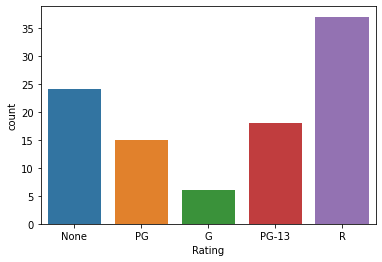

In [90]:
import seaborn as sns
sns.countplot(x = df.Rating)

In [114]:
df.Rating.value_counts()

R        37
None     24
PG-13    18
PG       15
G         6
Name: Rating, dtype: int64

In [121]:
df.to_csv(r'D:\Data Sets\file.csv', index=False)